# Speed distribution across F1 circuits

This is extrapolating from the speed distribution example notebook.

In [1]:
# Load packages

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import fastf1 as ff1

In [2]:
# Define commonly-used variables

year = 2024
race = ['Monaco','Barcelona']
ses = 'Q'
driver = 'NOR'
colormap = mpl.cm.plasma

In [33]:
# Load session data
def fastest_quali_lap(race, driver):
  session = ff1.get_session(year, race, ses)
  weekend = session.event
  session.load()
  lap = session.laps.pick_driver(driver).pick_fastest()
  
  return lap.telemetry['Speed']

season = {}

season['Bahrain'] = fastest_quali_lap('Bahrain', 'NOR')
season['Saudi Arabia'] = fastest_quali_lap('Saudi Arabia', 'NOR')
season['Australia'] = fastest_quali_lap('Australia', 'NOR')
season['Japan'] = fastest_quali_lap('Japan', 'NOR')
season['China'] = fastest_quali_lap('China', 'NOR')
season['Miami'] = fastest_quali_lap('Miami', 'NOR')
season['Imola'] = fastest_quali_lap('Imola', 'NOR')
season['Monaco'] = fastest_quali_lap('Monaco', 'NOR')
season['Canada'] = fastest_quali_lap('Canada', 'NOR')
season['Barcelona'] = fastest_quali_lap('Barcelona', 'NOR')
season['Austria'] = fastest_quali_lap('Austria', 'NOR')
season['Great Britain'] = fastest_quali_lap('Silverstone', 'NOR')
season['Hungary'] = fastest_quali_lap('Hungary', 'NOR')
season['Belgium'] = fastest_quali_lap('Belgium', 'NOR')
season['Netherlands'] = fastest_quali_lap('Netherlands', 'NOR')
season['Italy'] = fastest_quali_lap('Italy', 'NOR')
season['Azerbaijan'] = fastest_quali_lap('Azerbaijan', 'NOR')
season['Singapore'] = fastest_quali_lap('Singapore', 'NOR')
season['United States'] = fastest_quali_lap('United States', 'NOR')
season['Mexico'] = fastest_quali_lap('Mexico', 'NOR')
season['Brazil'] = fastest_quali_lap('Brazil', 'NOR')
season['Las Vegas'] = fastest_quali_lap('Las Vegas', 'NOR')
season['Qatar'] = fastest_quali_lap('Qatar', 'NOR')
season['Abu Dhabi'] = fastest_quali_lap('Abu Dhabi', 'NOR')

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 

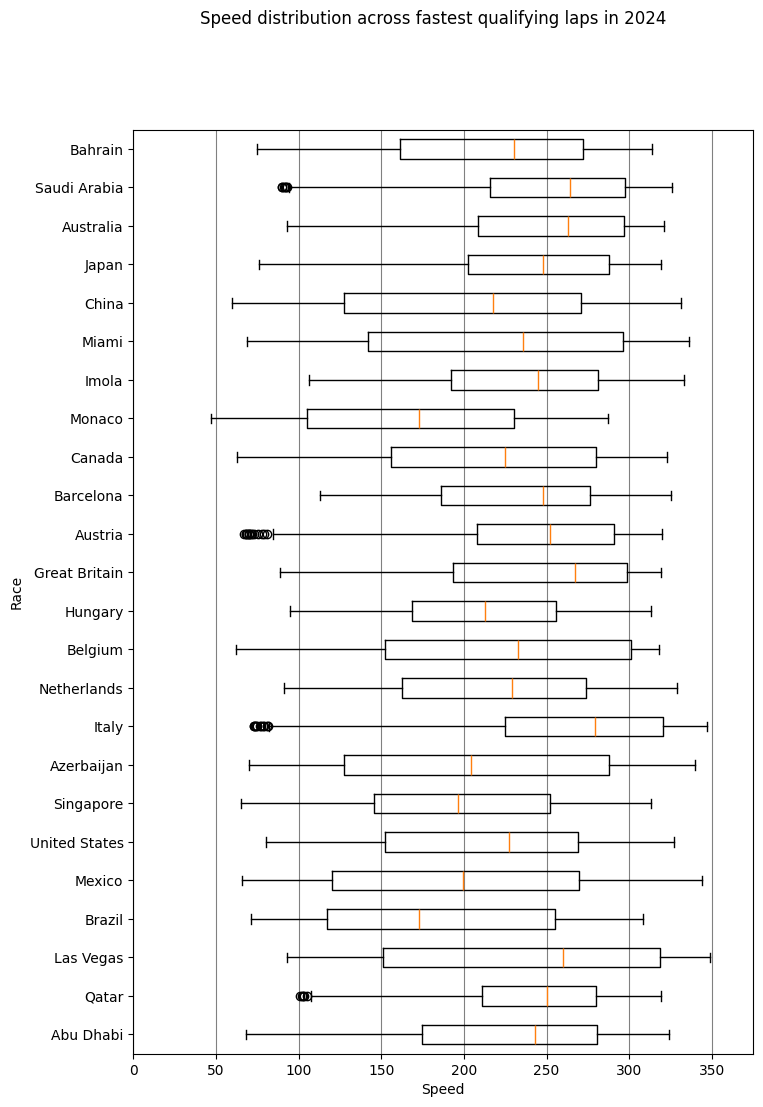

In [64]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 12))
fig.suptitle('Speed distribution across fastest qualifying laps in 2024')

labels, data = [*zip(*season.items())]

ax1.boxplot(
  data,
  orientation='horizontal'
)
# ax1.yticks(
#   range(1, len(labels) + 1),
#   labels
# )
ax1.set_yticklabels(
  # range(1, len(labels) + 1),
  labels
)

ax1.set_xlim((0, 375))
ax1.grid(color='gray', which='major', axis='x')
ax1.invert_yaxis()
ax1.set_xlabel('Speed')
ax1.set_ylabel('Race')

plt.show()

---

This is the end of the notebook.